# Data Wrangling

## introduction

The goal of this project is to wrangle WeRateDogs Twitter data and create interesting analyses 

## The Data we have 

- Enhanced Twitter Archive
- image predictions file
- Additional data from Twitter API

## Steps 

- Data wrangling, which consists of:
    - Gathering data
    - Assessing data
    - Cleaning data
- Storing, analyzing, and visualizing our wrangled data
- Reporting on 1) our data wrangling efforts and 2) our data analyses and visualizations


In [1]:
#import some important libraries
import re
import json
import shutil
import tweepy 
import requests
import matplotlib
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from timeit import default_timer as timer



# Gathering

In [2]:
#Enhanced Twitter Archive
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
#download image predictions file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(url.split('/')[-1],'wb') as file:
    file.write(response.content)
    


In [4]:
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t') 
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
#Additional data from Twitter API
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)


api = tweepy.API(auth, wait_on_rate_limit=True)

In [6]:

# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
     #This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [7]:
# Download tweet-json.txt
url ='https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
response = requests.get(url)
with open(url.split('/')[-1],'wb') as file:  
    file.write(response.content)

In [8]:
#convert txt file to json file
original = 'tweet-json.txt'
target = 'tweet-json.json'
shutil.copyfile(original, target)

In [9]:
df_list = []
with open('tweet-json.json', 'r') as file:
    count = 0
    lines = file.readlines()
    for line in lines:
        count +=1
        tweet = json.loads(line)
        tweet_id = tweet['id']
        favorites = tweet['favorite_count'] # tweet's favorites
        retweets = tweet['retweet_count'] 
        user_followers = tweet['user']['followers_count'] 
        user_favourites = tweet['user']['favourites_count'] # user's favorites
        date_time = tweet['created_at'] # The date and time of the creation
        df_list.append({'tweet_id': int(tweet_id), 'favorites': int(favorites),
                        'retweets': int(retweets),'user_followers': int(user_followers), 
                        'user_favourites': int(user_favourites),'date_time': pd.to_datetime(date_time)})"""


In [10]:
json_tweets = pd.DataFrame(df_list, columns = ['tweet_id', 'favorites', 'retweets', 'user_followers',
                                               'user_favourites', 'date_time'])
json_tweets.to_csv('tweet_json.csv',encoding = 'utf-8', index=False)

In [11]:
tweet_data = pd.read_csv('tweet_json.csv', encoding = 'utf-8')
tweet_data.head()

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,39467,8853,3200889,114031,2017-08-01 16:23:56
1,892177421306343426,33819,6514,3200889,114031,2017-08-01 00:17:27
2,891815181378084864,25461,4328,3200889,114031,2017-07-31 00:18:03
3,891689557279858688,42908,8964,3200889,114031,2017-07-30 15:58:51
4,891327558926688256,41048,9774,3200889,114031,2017-07-29 16:00:24


## Gathering Summary 

we finished the first step in tha data wrangling process.
we download a tsv file programtically and queried Twitter's API using Tweety.
finally we imported three files into the jupyter notebook 

# Assessing

In [12]:
#Random samples to assess visually
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1912,674394782723014656,NaN,NaN,2015-12-09 01:07:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gary. He's a hide and seek champion. S...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674394782...,8,10,Gary,None,None,None,None
1204,716080869887381504,NaN,NaN,2016-04-02 01:52:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super majestic doggo and a sunset 11/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716080869...,11,10,None,doggo,None,None,None
1699,680970795137544192,NaN,NaN,2015-12-27 04:37:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I thought I made this very clear. We only rate...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680970795...,9,10,None,None,None,None,None
697,786595970293370880,NaN,NaN,2016-10-13 15:54:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dale. He's a real spookster. Did me qu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/786595970...,11,10,Dale,None,None,None,None
1631,684481074559381504,NaN,NaN,2016-01-05 21:06:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Pippa. She's an Elfin High Feta. Compact ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684481074...,10,10,Pippa,None,None,None,None


__Quality:__
- Source format is bad and can not be read easily.

__Tidiness:__
- Dog stage is in 4 columns (doggo, floofer, pupper, puppo) but we need one column to represent dog stage.

In [13]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

__Quality:__
- missing values in (in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,doggo,floofer,pupper,puppo)
- (in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id) shoud be int instead of float
- We may want to change this columns type (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id,tweet_id) to string because We don't want any operations on them.
- (timestamp ,retweeted_status_timestamp) shoud be datatime instead of object


In [14]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
twitter_archive[twitter_archive.rating_denominator==170]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None


In [16]:
sum(twitter_archive.tweet_id.duplicated())

0

In [17]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [18]:
len(twitter_archive[twitter_archive.rating_denominator!=10])

23

In [19]:
twitter_archive[twitter_archive.rating_denominator!=10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [20]:
len(twitter_archive[twitter_archive.rating_numerator>20])

24

In [21]:
twitter_archive[twitter_archive.rating_numerator>20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


In [22]:
twitter_archive[twitter_archive.name.apply(len) <= 2]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
393,825876512159186944,NaN,NaN,2017-01-30 01:21:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mo. No one will push him around in the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825876512...,11,10,Mo,None,None,None,None
446,819015337530290176,NaN,NaN,2017-01-11 02:57:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He was a very good ...,8.190048e+17,4.196984e+09,2017-01-11 02:15:36 +0000,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
449,819004803107983360,NaN,NaN,2017-01-11 02:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He was a very good First Doggo. 14...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
553,804026241225523202,NaN,NaN,2016-11-30 18:16:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's going to make me cry. 13/10 p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/804026241...,13,10,Bo,None,None,None,None
583,800188575492947969,NaN,NaN,2016-11-20 04:06:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He's a Benedoop Cum...,6.816941e+17,4.196984e+09,2015-12-29 04:31:49 +0000,https://twitter.com/dog_rates/status/681694085...,11,10,Bo,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
679,789137962068021249,NaN,NaN,2016-10-20 16:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's a West Congolese Bugaboop Snu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/789137962...,12,10,Bo,None,None,None,None
686,788070120937619456,NaN,NaN,2016-10-17 17:32:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo and Ty. Bo eats pape...,7.610045e+17,4.196984e+09,2016-08-04 01:03:17 +0000,https://twitter.com/dog_rates/status/761004547...,11,10,Bo,None,None,None,None
759,778396591732486144,NaN,NaN,2016-09-21 00:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is an East African Chalupa...,7.030419e+17,4.196984e+09,2016-02-26 02:20:37 +0000,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None


__Quality:__
- source column may be used as categories instead of object.
- The numerator and denominator columns have invalid values.
- There are invalid names (a, an and less than 3 characters).
- There are retweeted tweets, and we do not want it.

In [23]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1139,729463711119904772,https://pbs.twimg.com/media/Ch-TXpFXAAAwPGf.jpg,1,German_shepherd,0.829307,True,Doberman,0.022500,True,basenji,0.021190,True
1858,841833993020538882,https://pbs.twimg.com/ext_tw_video_thumb/81742...,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
396,673656262056419329,https://pbs.twimg.com/media/CVlOy3pW4AQ9H1K.jpg,1,bull_mastiff,0.700625,True,Rhodesian_ridgeback,0.094698,True,Brabancon_griffon,0.057559,True
392,673580926094458881,https://pbs.twimg.com/media/CVkKRqOXIAEX83-.jpg,1,beagle,0.985062,True,basset,0.006418,True,Walker_hound,0.003533,True
690,684195085588783105,https://pbs.twimg.com/media/CX6_y6OU0AAl3v2.jpg,1,Chihuahua,0.379365,True,toy_terrier,0.121809,True,Boston_bull,0.095981,True


In [24]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [26]:
sum(image_predictions.tweet_id.duplicated())

0

In [27]:
sum(image_predictions.jpg_url.duplicated())

66

In [28]:
image_predictions[image_predictions.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
1387,766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True


__Quality:__
- Missing values from images dataset (2075 rows instead of 2356).
- Some tweet_ids have the same jpg_url
- Some tweets have 2 different tweet_id, that is retweets.


In [29]:
tweet_data.sample(5)

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
1246,711363825979756544,3996,1287,3200947,114031,2016-03-20 01:28:47
285,838831947270979586,0,12643,3200891,114031,2017-03-06 19:21:35
1327,705898680587526145,2597,643,3200947,114031,2016-03-04 23:32:15
1334,705223444686888960,2829,900,3200947,114031,2016-03-03 02:49:06
726,782305867769217024,18630,6470,3200901,114031,2016-10-01 19:47:08


In [30]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 6 columns):
tweet_id           2354 non-null int64
favorites          2354 non-null int64
retweets           2354 non-null int64
user_followers     2354 non-null int64
user_favourites    2354 non-null int64
date_time          2354 non-null object
dtypes: int64(5), object(1)
memory usage: 110.4+ KB


In [31]:
tweet_data.describe()

,tweet_id,favorites,retweets,user_followers,user_favourites
count,2.354000e+03,2354.000000,2354.000000,2.354000e+03,2354.000000
mean,7.426978e+17,8080.968564,3164.797366,3.200942e+06,114031.010195
std,6.852812e+16,11814.771334,5284.770364,4.457302e+01,0.100478
min,6.660209e+17,0.000000,0.000000,3.200799e+06,114031.000000
25%,6.783975e+17,1415.000000,624.500000,3.200898e+06,114031.000000
50%,7.194596e+17,3603.500000,1473.500000,3.200945e+06,114031.000000
75%,7.993058e+17,10122.250000,3652.000000,3.200953e+06,114031.000000
max,8.924206e+17,132810.000000,79515.000000,3.201018e+06,114032.000000


__Tidiness:__
- Merge 'tweet_data' and 'image_predictions' into 'twitter_archive'.

## Assessing Summary

### Quality

- twitter_archive
  - Source format is bad and can not be read easily.
  - missing values in (in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,doggo,floofer,pupper,puppo)
  - (in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id) shoud be int instead of float
  - We may want to change this columns type (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id,tweet_id) to string because We don't want any operations on them.
  - In several columns null objects are non-null (None to NaN).
  - (timestamp ,retweeted_status_timestamp) shoud be datatime instead of object
  - source column may be used as categories instead of object.
  - The numerator and denominator columns have invalid values.
  - There are invalid names (a, an and less than 3 characters).
  - There are retweeted tweets, and we do not want it.
- image_predictions
  - Missing values from images dataset (2075 rows instead of 2356).
  - Some tweet_ids have the same jpg_url
  - Some tweets have 2 different tweet_id, that is retweets.

### Tidiness

- Dog stage is in 4 columns (doggo, floofer, pupper, puppo) but we need one column to represent dog stage.
- Merge 'tweet_data' and 'image_predictions' into 'twitter_archive'.

# Cleaning

- tidiness
- missing data in 
- quality

In [32]:
#Copy Dataframes
tweet_data_clean = tweet_data.copy()
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean= image_predictions.copy()

In [33]:
twitter_archive_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [34]:
tweet_data_clean.head()

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,39467,8853,3200889,114031,2017-08-01 16:23:56
1,892177421306343426,33819,6514,3200889,114031,2017-08-01 00:17:27
2,891815181378084864,25461,4328,3200889,114031,2017-07-31 00:18:03
3,891689557279858688,42908,8964,3200889,114031,2017-07-30 15:58:51
4,891327558926688256,41048,9774,3200889,114031,2017-07-29 16:00:24


In [35]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


__Define__
- Merge 'tweet_data' and 'image_predictions' into 'twitter_archive' using merge function from pandas.

__Code__

In [36]:
twitter_archive_clean = twitter_archive_clean.merge(tweet_data_clean ,on='tweet_id', how='inner') 

In [37]:
twitter_archive_clean = twitter_archive_clean.merge(image_predictions_clean ,on='tweet_id', how='inner')

__Test__

In [38]:
twitter_archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1060,709519240576036864,NaN,NaN,2016-03-14 23:19:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Vince. He's a Gregorian Flapjeck. Whit...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709519240...,...,1,cocker_spaniel,0.414982,True,Newfoundland,0.225482,True,flat-coated_retriever,0.196789,True
988,718540630683709445,NaN,NaN,2016-04-08 20:46:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Get you a pup that can do both. 10/10 https://...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/718540630...,...,2,Maltese_dog,0.632289,True,West_Highland_white_terrier,0.187055,True,cairn,0.044413,True
1963,667885044254572545,NaN,NaN,2015-11-21 01:59:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Stu. Stu has stacks on stacks and an eye ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667885044...,...,1,malamute,0.088530,True,golden_retriever,0.087499,True,muzzle,0.075008,False
307,826848821049180160,NaN,NaN,2017-02-01 17:44:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cupid. He was found in the trash. Now ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/826848821...,...,4,Great_Pyrenees,0.858764,True,golden_retriever,0.023526,True,Pekinese,0.017104,True
516,793226087023144960,NaN,NaN,2016-10-31 23:00:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Juno. She spooked me up real good, but...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/793226087...,...,1,wire-haired_fox_terrier,0.456047,True,Lakeland_terrier,0.273428,True,English_springer,0.083643,True


In [39]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 33 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
favorites                     2073 

__Define__

Move doggo, floofer, pupper and puppo columns into one column dog_stage.

__Code__

In [40]:
twitter_archive_clean.loc[twitter_archive_clean.doggo == 'None', 'doggo'] = ''
twitter_archive_clean.loc[twitter_archive_clean.floofer == 'None', 'floofer'] = ''
twitter_archive_clean.loc[twitter_archive_clean.pupper == 'None', 'pupper'] = ''
twitter_archive_clean.loc[twitter_archive_clean.puppo == 'None', 'puppo'] = ''

twitter_archive_clean['dog_stage'] = ''

In [41]:
twitter_archive_clean['dog_stage'] = twitter_archive_clean.doggo + twitter_archive_clean.floofer + twitter_archive_clean.pupper + twitter_archive_clean.puppo


In [42]:
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo,pupper'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo,puppo'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo,floofer'

__Test__

In [43]:
twitter_archive_clean['dog_stage'].value_counts()

                 1753
pupper            210
doggo              67
puppo              23
doggo,pupper       11
floofer             7
doggo,puppo         1
doggo,floofer       1
Name: dog_stage, dtype: int64

In [44]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 34 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
favorites                     2073 

In [45]:
sum(twitter_archive_clean.tweet_id.duplicated())

0

__Define__
- convert (None to NaN).

__code__

In [46]:
twitter_archive_clean.loc[twitter_archive_clean.name == 'None', 'name'] = np.nan

__Test__

In [47]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 34 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          1496 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
favorites                     2073 

__Define__

Delete rows and columns that we will not use them or benefit from them.

- missing values in (in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,doggo,floofer,pupper,puppo)

__Code__

In [48]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull() & twitter_archive_clean.retweeted_status_user_id.isnull() & twitter_archive_clean.retweeted_status_timestamp.isnull()]

In [49]:
twitter_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','date_time','doggo','floofer','pupper','puppo'],axis = 1,inplace = True)
twitter_archive_clean.drop_duplicates(inplace = True)

__Test__

In [50]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 24 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1448 non-null object
favorites             1994 non-null int64
retweets              1994 non-null int64
user_followers        1994 non-null int64
user_favourites       1994 non-null int64
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object


In [51]:
list(twitter_archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'favorites',
 'retweets',
 'user_followers',
 'user_favourites',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'dog_stage']

In [52]:
print(twitter_archive_clean.dog_stage.value_counts())
print(len(twitter_archive_clean))

                 1688
pupper            203
doggo              63
puppo              22
doggo,pupper        9
floofer             7
doggo,puppo         1
doggo,floofer       1
Name: dog_stage, dtype: int64
1994


__Define__

Delete image prediction columns that we don't need

__Code__

In [53]:
# Append the first True predection to the list 'perdictions' and the level appended to list 'confidence_level',
# Otherwise, will append NaN.

predictions = []
confidence_level = []

def prediction_func(df):
    if df.p1_dog == True:
        predictions.append(df.p1)
        confidence_level.append(df.p1_conf)
    elif df.p2_dog == True:
        predictions.append(df.p2)
        confidence_level.append(df.p2_conf)  
    elif df.p3_dog == True:
        predictions.append(df.p3)
        confidence_level.append(df.p3_conf)
    else:
        predictions.append(np.nan)
        confidence_level.append(0)
        
twitter_archive_clean.apply(prediction_func , axis = 1)
twitter_archive_clean['prediction'] = predictions
twitter_archive_clean['confidence_level'] = confidence_level

# Delete columns
twitter_archive_clean.drop([ 'p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog']
                           ,axis = 1,inplace = True)

__Test__

In [54]:
list(twitter_archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'favorites',
 'retweets',
 'user_followers',
 'user_favourites',
 'jpg_url',
 'img_num',
 'dog_stage',
 'prediction',
 'confidence_level']

In [55]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,user_followers,user_favourites,jpg_url,img_num,dog_stage,prediction,confidence_level
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,39467,8853,3200889,114031,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,,NaN,0.000000
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,33819,6514,3200889,114031,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,25461,4328,3200889,114031,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,42908,8964,3200889,114031,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,41048,9774,3200889,114031,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,,basset,0.555712


In [56]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 17 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1448 non-null object
favorites             1994 non-null int64
retweets              1994 non-null int64
user_followers        1994 non-null int64
user_favourites       1994 non-null int64
jpg_url               1994 non-null object
img_num               1994 non-null int64
dog_stage             1994 non-null object
prediction            1686 non-null object
confidence_level      1994 non-null float64
dtypes: float64(1), int64(8), object(8)
memory usage: 280.4+ KB


__Define__

make source column in readable format.

__Code__

In [57]:
twitter_archive_clean['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1955
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [58]:
twitter_archive_clean['source'] = twitter_archive_clean['source'].apply(lambda x : re.findall(r'>(.*)<',x)[0])

__Test__

In [59]:
twitter_archive_clean['source'].value_counts()

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

__Define__

Fix rating numerator and denominators. 

__Code__

In [60]:
tmp_rating = twitter_archive_clean[twitter_archive_clean.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")].text

for text in tmp_rating:
    x = twitter_archive_clean.text == text
    column_1 = 'rating_numerator'
    column_2 = 'rating_denominator'
    
    temp_list = list(re.findall(r"(\d+\.?\d*)\/\d+\.?\d*\D+(\d+\.?\d*)\/\d+\.?\d*",text)[0])
    
    twitter_archive_clean.loc[x, column_1] =  max(map(int,temp_list))
    twitter_archive_clean.loc[x, column_2] = 10

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


__Test__

In [61]:
twitter_archive_clean[twitter_archive_clean.text.isin(tmp_rating)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,user_followers,user_favourites,jpg_url,img_num,dog_stage,prediction,confidence_level
616,777684233540206592,2016-09-19 01:42:24 +0000,Twitter for iPhone,"""Yep... just as I suspected. You're not flossi...",https://twitter.com/dog_rates/status/777684233...,12,10,NaN,12518,3403,3200902,114031,https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg,1,,cocker_spaniel,0.253442
825,747600769478692864,2016-06-28 01:21:27 +0000,Twitter for iPhone,This is Bookstore and Seaweed. Bookstore is ti...,https://twitter.com/dog_rates/status/747600769...,10,10,Bookstore,2545,619,3200943,114031,https://pbs.twimg.com/media/CmAC7ehXEAAqSuW.jpg,1,,Chesapeake_Bay_retriever,0.804363
876,740373189193256964,2016-06-08 02:41:38 +0000,Twitter for iPhone,"After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,14,10,NaN,20648,9220,3200943,114031,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,3,,golden_retriever,0.807644
967,722974582966214656,2016-04-21 02:25:47 +0000,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,13,10,NaN,4493,1764,3200945,114031,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,1,,Great_Dane,0.246762
1001,716439118184652801,2016-04-03 01:36:11 +0000,Twitter for iPhone,This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,10,Bluebert,2574,247,3200945,114031,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,1,,Siberian_husky,0.396495
1017,714258258790387713,2016-03-28 01:10:13 +0000,Twitter for iPhone,Meet Travis and Flurp. Travis is pretty chill ...,https://twitter.com/dog_rates/status/714258258...,10,10,Travis,3281,808,3200947,114031,https://pbs.twimg.com/media/CemOGNjWQAEoN7R.jpg,1,,collie,0.176758
1139,703356393781329922,2016-02-26 23:10:06 +0000,Twitter for iPhone,This is Socks. That water pup w the super legs...,https://twitter.com/dog_rates/status/703356393...,9,10,Socks,2085,429,3200949,114031,https://pbs.twimg.com/media/CcLS6QKUcAAUuPa.jpg,1,,Border_collie,0.894842
1229,695064344191721472,2016-02-04 02:00:27 +0000,Twitter for iPhone,This may be the greatest video I've ever been ...,https://twitter.com/dog_rates/status/695064344...,13,10,NaN,1771,685,3200950,114031,https://pbs.twimg.com/ext_tw_video_thumb/69506...,1,,NaN,0.000000
1234,694352839993344000,2016-02-02 02:53:12 +0000,Twitter for iPhone,Meet Oliviér. He takes killer selfies. Has a d...,https://twitter.com/dog_rates/status/694352839...,10,10,Oliviér,2244,700,3200950,114031,https://pbs.twimg.com/media/CaLWOPfWkAAo2Dt.jpg,2,,Australian_terrier,0.407886
1269,691483041324204033,2016-01-25 04:49:38 +0000,Twitter for iPhone,When bae says they can't go out but you see th...,https://twitter.com/dog_rates/status/691483041...,10,10,NaN,2608,656,3200950,114031,https://pbs.twimg.com/media/CZikKBIWYAA40Az.jpg,1,,bloodhound,0.886232


In [62]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 17 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1448 non-null object
favorites             1994 non-null int64
retweets              1994 non-null int64
user_followers        1994 non-null int64
user_favourites       1994 non-null int64
jpg_url               1994 non-null object
img_num               1994 non-null int64
dog_stage             1994 non-null object
prediction            1686 non-null object
confidence_level      1994 non-null float64
dtypes: float64(1), int64(8), object(8)
memory usage: 280.4+ KB


__Define__

Change datatypes .

__Code__

In [63]:
twitter_archive_clean['tweet_id'] = twitter_archive_clean.tweet_id.astype(str)
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean.timestamp)
twitter_archive_clean['source'] = twitter_archive_clean.source.astype('category')
twitter_archive_clean['dog_stage'] = twitter_archive_clean.dog_stage.astype('category')

__Test__

In [64]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 17 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
source                1994 non-null category
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1448 non-null object
favorites             1994 non-null int64
retweets              1994 non-null int64
user_followers        1994 non-null int64
user_favourites       1994 non-null int64
jpg_url               1994 non-null object
img_num               1994 non-null int64
dog_stage             1994 non-null category
prediction            1686 non-null object
confidence_level      1994 non-null float64
dtypes: category(2), datetime64[ns](1), float64(1), int64(7), object(6)
memory usage: 253.6+ KB


In [65]:
twitter_archive_clean.dog_stage.value_counts()

                 1688
pupper            203
doggo              63
puppo              22
doggo,pupper        9
floofer             7
doggo,puppo         1
doggo,floofer       1
Name: dog_stage, dtype: int64

In [66]:
twitter_archive_clean.drop(twitter_archive_clean.columns[twitter_archive_clean.columns.str.contains('Unnamed',case = False)],axis = 1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,user_followers,user_favourites,jpg_url,img_num,dog_stage,prediction,confidence_level
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,39467,8853,3200889,114031,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,,NaN,0.000000
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,33819,6514,3200889,114031,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,25461,4328,3200889,114031,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,42908,8964,3200889,114031,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,41048,9774,3200889,114031,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,,basset,0.555712
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,20562,3261,3200889,114031,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,,Chesapeake_Bay_retriever,0.425595
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,12041,2158,3200889,114031,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,,Appenzeller,0.341703
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,56848,16716,3200889,114031,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,,Pomeranian,0.566142
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,28226,4429,3200889,114031,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,,Irish_terrier,0.487574
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,32467,7711,3200889,114031,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,doggo,Pembroke,0.511319


__Store__

In [67]:
twitter_archive_clean.drop(twitter_archive_clean.columns[twitter_archive_clean.columns.str.contains('Unnamed',case = False)],axis = 1)
twitter_archive_clean.to_csv('twitter_archive_master.csv', encoding = 'utf-8', index=False)

twitter_archive_clean = pd.read_csv('twitter_archive_master.csv')
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 17 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1448 non-null object
favorites             1994 non-null int64
retweets              1994 non-null int64
user_followers        1994 non-null int64
user_favourites       1994 non-null int64
jpg_url               1994 non-null object
img_num               1994 non-null int64
dog_stage             306 non-null object
prediction            1686 non-null object
confidence_level      1994 non-null float64
dtypes: float64(1), int64(8), object(8)
memory usage: 264.9+ KB


__Data has been successfully stored in *twitter_archive_master.csv*__

# Analyzing & Visualizing Data

In [68]:
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,user_followers,user_favourites,jpg_url,img_num,dog_stage,prediction,confidence_level
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,39467,8853,3200889,114031,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN,NaN,0.000000
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,33819,6514,3200889,114031,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,NaN,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,25461,4328,3200889,114031,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,NaN,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,42908,8964,3200889,114031,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,NaN,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,41048,9774,3200889,114031,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,NaN,basset,0.555712


In [69]:
df.describe()

,tweet_id,rating_numerator,rating_denominator,favorites,retweets,user_followers,user_favourites,img_num,confidence_level
count,1.994000e+03,1994.000000,1994.000000,1994.000000,1994.000000,1.994000e+03,1994.000000,1994.000000,1994.000000
mean,7.358508e+17,12.304413,10.510030,8895.725677,2766.753260,3.200946e+06,114031.010030,1.203109,0.464991
std,6.747816e+16,41.495321,7.261522,12213.193181,4674.698447,4.478196e+01,0.099672,0.560777,0.339470
min,6.660209e+17,0.000000,7.000000,81.000000,16.000000,3.200799e+06,114031.000000,1.000000,0.000000
25%,6.758475e+17,10.000000,10.000000,1982.000000,624.750000,3.200901e+06,114031.000000,1.000000,0.140466
50%,7.084748e+17,11.000000,10.000000,4136.000000,1359.500000,3.200947e+06,114031.000000,1.000000,0.459130
75%,7.877873e+17,12.000000,10.000000,11308.000000,3220.000000,3.201002e+06,114031.000000,1.000000,0.776387
max,8.924206e+17,1776.000000,170.000000,132810.000000,79515.000000,3.201018e+06,114032.000000,4.000000,0.999956


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 17 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1448 non-null object
favorites             1994 non-null int64
retweets              1994 non-null int64
user_followers        1994 non-null int64
user_favourites       1994 non-null int64
jpg_url               1994 non-null object
img_num               1994 non-null int64
dog_stage             306 non-null object
prediction            1686 non-null object
confidence_level      1994 non-null float64
dtypes: float64(1), int64(8), object(8)
memory usage: 264.9+ KB


In [71]:
# Convert columns to their appropriate types and set the timestamp as an index
df['tweet_id'] = df.tweet_id.astype(str)
df['timestamp'] = pd.to_datetime(df.timestamp)
df['source'] = df.source.astype('category')
df['dog_stage'] = df.dog_stage.astype('category')

df.set_index('timestamp', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1994 entries, 2017-08-01 16:23:56 to 2015-11-15 22:32:08
Data columns (total 16 columns):
tweet_id              1994 non-null object
source                1994 non-null category
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1448 non-null object
favorites             1994 non-null int64
retweets              1994 non-null int64
user_followers        1994 non-null int64
user_favourites       1994 non-null int64
jpg_url               1994 non-null object
img_num               1994 non-null int64
dog_stage             306 non-null category
prediction            1686 non-null object
confidence_level      1994 non-null float64
dtypes: category(2), float64(1), int64(7), object(6)
memory usage: 238.0+ KB


In [72]:
df.head()

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,user_followers,user_favourites,jpg_url,img_num,dog_stage,prediction,confidence_level
timestamp,,,,,,,,,,,,,,,,
2017-08-01 16:23:56,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,39467,8853,3200889,114031,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN,NaN,0.000000
2017-08-01 00:17:27,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,33819,6514,3200889,114031,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,NaN,Chihuahua,0.323581
2017-07-31 00:18:03,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,25461,4328,3200889,114031,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,NaN,Chihuahua,0.716012
2017-07-30 15:58:51,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,42908,8964,3200889,114031,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,NaN,Labrador_retriever,0.168086
2017-07-29 16:00:24,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,41048,9774,3200889,114031,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,NaN,basset,0.555712


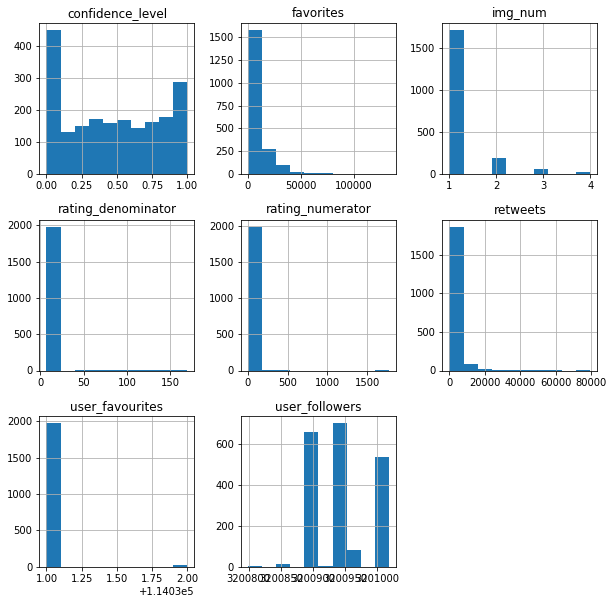

In [73]:
df.hist(figsize=(10,10));

## What is the most common dog?

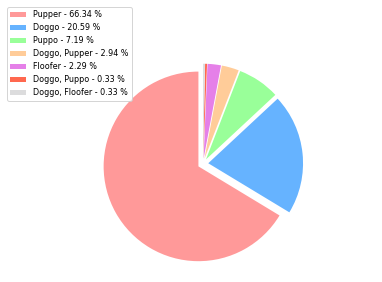

In [74]:
x = np.char.array(['Pupper', 'Doggo', 'Puppo', 'Doggo, Pupper', 'Floofer', 'Doggo, Puppo', 'Doggo, Floofer'])
y = np.array(list(df[df['dog_stage'] != 'None']['dog_stage'].value_counts())[0:7])
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#E580E8','#FF684F','#DCDCDD']
porcent = 100.*y/y.sum()

explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1) 
patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.8,  explode = explode)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]




plt.legend(patches, labels, loc='center left', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)
plt.axis('equal')

plt.savefig('Most_common_dog.png', bbox_inches='tight')

- Pupper is the most common owned dog.

## What is the most common rating?

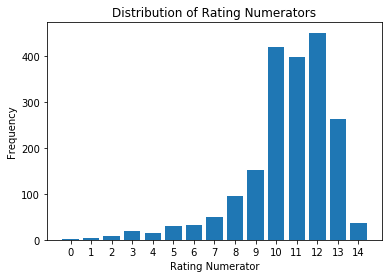

In [76]:
df_integer_ratings_14 =  df[df.rating_numerator<=14]
subset_rating_counts = df_integer_ratings_14.groupby(['rating_numerator']).count()['tweet_id']

plt.bar(np.arange(15), subset_rating_counts)
plt.xticks(np.arange(15))
plt.xlabel('Rating Numerator')
plt.ylabel('Frequency')
plt.title('Distribution of Rating Numerators');
plt.savefig('Most_common_rates.png', bbox_inches='tight');

- Most tweets are given a rating between 10 to 13.

## What is the relation between Retweets & Likes?

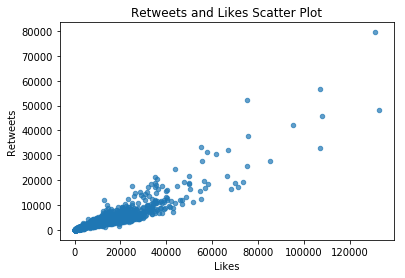

In [77]:
#Retweets vs. Likes

df.plot(kind='scatter',x='favorites',y='retweets', alpha = 0.7)
plt.xlabel('Likes')
plt.ylabel('Retweets')
plt.title('Retweets and Likes Scatter Plot')

plt.savefig('Retweets_vs_Likes.png', bbox_inches='tight')

- Retweets are positively correlated with Likes.

## What is the relation between number of image & Likes?

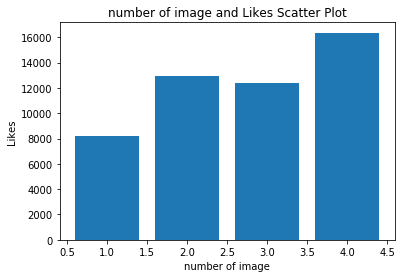

In [78]:
#number of image vs. Likes

data_plot = df.groupby('img_num')['favorites'].mean()
plt.bar(data_plot.index, data_plot)

plt.xlabel('number of image')
plt.ylabel('Likes')
plt.title('number of image and Likes Scatter Plot')


plt.savefig('img_num_vs_Likes.png', bbox_inches='tight')


- more images mean more attention and more likes .